In [1]:
import pandas as pd
import numpy as np

### Step 1: Importing Data

In [2]:
df= pd.read_csv('train.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,144035,-0.795465,1.035145,0.629094,1.060550,0.185512,0.442982,0.367739,0.629104,-0.215407,...,-0.224165,-0.406332,-0.113468,-0.519506,0.062945,-0.625920,0.305893,0.130054,35.80,0
1,57027,-2.335655,2.225380,-3.379450,2.178538,-3.568264,0.316814,-1.734948,1.449139,-1.980033,...,0.785540,0.297412,0.308536,-0.598416,-0.121850,-0.491018,0.701606,0.206966,444.17,1
2,75347,1.485941,-0.325035,-0.551499,-0.845371,-0.216371,-0.917921,-0.011792,-0.375973,-1.136155,...,0.145207,0.346199,-0.281322,-0.404634,0.909394,-0.034868,-0.030328,-0.004064,25.00,0
3,75424,-0.804963,0.712653,1.360827,-0.332024,1.302313,1.623387,0.551873,0.637665,-0.844825,...,0.219177,0.644723,-0.258438,-1.357390,0.469040,-0.272856,0.023010,-0.053357,18.95,0
4,102676,-5.552122,5.678134,-9.775528,8.416295,-4.409844,-1.506235,-6.899839,3.750443,-3.879793,...,1.128472,0.228484,0.286258,-0.536294,-0.104925,0.420919,-0.297557,-0.946184,119.74,1


### Step 2: Cleaning Data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 902 entries, 0 to 901
Data columns (total 31 columns):
Time      902 non-null int64
V1        902 non-null float64
V2        902 non-null float64
V3        902 non-null float64
V4        901 non-null float64
V5        901 non-null float64
V6        901 non-null float64
V7        901 non-null float64
V8        901 non-null float64
V9        902 non-null float64
V10       902 non-null float64
V11       902 non-null float64
V12       902 non-null float64
V13       902 non-null float64
V14       901 non-null float64
V15       901 non-null float64
V16       901 non-null float64
V17       901 non-null float64
V18       901 non-null float64
V19       901 non-null float64
V20       902 non-null float64
V21       902 non-null float64
V22       902 non-null float64
V23       902 non-null float64
V24       902 non-null float64
V25       902 non-null float64
V26       902 non-null float64
V27       902 non-null float64
V28       902 non-null float6

In [5]:
df.isnull().values.any()

True

In [6]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        1
V5        1
V6        1
V7        1
V8        1
V9        0
V10       0
V11       0
V12       0
V13       0
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
df[df['V4'].isnull()]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
900,11131,-1.426623,4.141986,-9.804103,NaN,NaN,NaN,NaN,NaN,-3.249516,...,1.865679,0.407809,0.605809,-0.769348,-1.746337,0.50204,1.977258,0.711607,1.0,1


In [8]:
df.dropna(inplace=True)

In [9]:
df.isnull().values.any()

False

### Step 3: Data Preprocessing

In [10]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,...,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,89579.985556,-2.302370,1.776772,-3.533859,2.210778,-1.613497,-0.699977,-2.703860,0.381013,-1.270022,...,0.366111,-0.005000,-0.031945,-0.038475,0.030377,0.025562,0.077531,0.036373,108.953633,0.500000
std,48739.857474,5.546627,3.672593,6.171931,3.174811,4.342731,1.890163,5.877914,4.853342,2.297901,...,2.702693,1.139523,1.196382,0.573055,0.661572,0.468758,0.989314,0.421468,308.928972,0.500278
min,406.000000,-30.552380,-8.402154,-31.103685,-4.401290,-29.730600,-6.406267,-43.557242,-41.044261,-13.434066,...,-22.797604,-8.887017,-19.254328,-2.028024,-4.781606,-1.149923,-7.263482,-1.869290,0.000000,0.000000
25%,47249.750000,-2.825991,-0.195431,-5.068730,-0.105275,-1.775001,-1.587624,-2.992775,-0.178557,-2.301580,...,-0.162558,-0.543180,-0.226998,-0.379574,-0.301918,-0.295559,-0.059425,-0.053411,1.625000,0.000000
50%,81674.500000,-0.712196,0.896925,-1.456225,1.206713,-0.458894,-0.672049,-0.602134,0.150282,-0.680745,...,0.130469,-0.017277,-0.025929,0.016212,0.049648,-0.026232,0.046411,0.027474,18.970000,0.500000
75%,138944.250000,1.138937,2.777569,0.366721,4.173330,0.529846,0.035199,0.266629,0.944850,0.213191,...,0.651412,0.570253,0.194164,0.382373,0.393059,0.350455,0.419129,0.206210,99.990000,1.000000
max,172622.000000,2.369906,22.057729,3.225532,12.114672,11.095089,21.307738,31.527244,20.007208,4.762324,...,27.202839,8.361985,5.466230,3.569702,2.208209,1.884741,4.655054,3.503999,6454.740000,1.000000


In [11]:
df.groupby('Class').count()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,450,450,450,450,450,450,450,450,450,450,...,450,450,450,450,450,450,450,450,450,450
1,450,450,450,450,450,450,450,450,450,450,...,450,450,450,450,450,450,450,450,450,450


In [12]:
X_df = df.drop(columns=['Class'])
y_df = df['Class']

In [13]:
X_df.shape, y_df.shape

((900, 30), (900,))

In [14]:
X = np.array(X_df)
y = np.array(y_df)

In [35]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
scale.fit_transform(X)

array([[0.83400497, 0.90385325, 0.30982715, ..., 0.63509271, 0.37208942,
        0.00554631],
       [0.32877898, 0.85707065, 0.34890264, ..., 0.66829419, 0.38640329,
        0.068813  ],
       [0.43515701, 0.97314995, 0.26517236, ..., 0.60688275, 0.34712932,
        0.00387312],
       ...,
       [0.9008919 , 0.89642356, 0.37783653, ..., 0.66606746, 0.41061749,
        0.01468998],
       [0.67160426, 0.95684792, 0.31962279, ..., 0.66189093, 0.40663504,
        0.01007012],
       [0.43882102, 0.77186794, 0.39300561, ..., 0.6243462 , 0.47100491,
        0.015477  ]])

### Step 4: Splitting Data into Train and Valid Set

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.05, shuffle=True)

In [46]:
X_train.shape , X_valid.shape, y_train.shape, y_valid.shape

((855, 30), (45, 30), (855,), (45,))

### Step 5: Modelling Data

In [47]:
import tensorflow as tf

In [48]:
import keras
from keras.layers import BatchNormalization
from keras.layers.core import Flatten,Dense,Dropout, Activation, Lambda
from keras.models import Model, Sequential
from keras.optimizers import Adam,SGD
from keras.callbacks import TensorBoard

In [96]:
model = Sequential()
#model.add(Lambda(lambda x: x , input_shape = (24)))
#model.add(Lambda(lambda x: x+0.1 , input_shape = (64,64,3)))
#model.add(Flatten())
model.add(BatchNormalization(input_shape=(30,)))
model.add(Dense(1000))
model.add(Activation('relu'))


model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(500))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(50))
model.add(Activation('relu'))

model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(optimizer = Adam(lr=0.001) , loss = 'binary_crossentropy', metrics=['accuracy'])

In [97]:
model.fit(X_train, y_train, epochs=30, verbose =1, validation_data=(X_valid, y_valid))

Train on 855 samples, validate on 45 samples
Epoch 1/30
855/855 [==============================] - 3s 4ms/step - loss: 0.2994 - acc: 0.8784 - val_loss: 0.1750 - val_acc: 0.9556
Epoch 2/30
855/855 [==============================] - 0s 440us/step - loss: 0.1615 - acc: 0.9380 - val_loss: 0.1140 - val_acc: 0.9556
Epoch 3/30
855/855 [==============================] - 0s 438us/step - loss: 0.1539 - acc: 0.9310 - val_loss: 0.0976 - val_acc: 0.9556
Epoch 4/30
855/855 [==============================] - 0s 448us/step - loss: 0.1345 - acc: 0.9532 - val_loss: 0.1273 - val_acc: 0.9778
Epoch 5/30
855/855 [==============================] - 0s 447us/step - loss: 0.1220 - acc: 0.9497 - val_loss: 0.0825 - val_acc: 0.9778
Epoch 6/30
855/855 [==============================] - 0s 449us/step - loss: 0.1331 - acc: 0.9556 - val_loss: 0.1283 - val_acc: 0.9778
Epoch 7/30
855/855 [==============================] - 0s 456us/step - loss: 0.1121 - acc: 0.9637 - val_loss: 0.1408 - val_acc: 0.9556
Epoch 8/30
855/855 

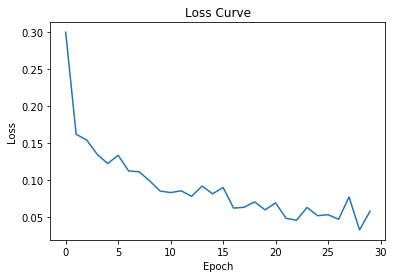

In [98]:
import matplotlib.pyplot as plt
plt.plot(model.history.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.show()

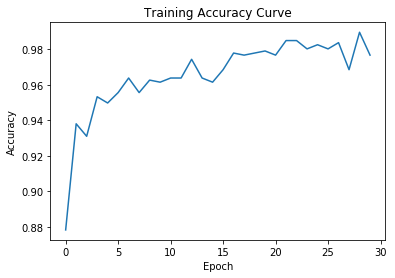

In [99]:
plt.plot(model.history.history['acc'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training Accuracy Curve')
plt.show()

### Step 6: Inference on Test Set

In [100]:
test_df = pd.read_csv('./test.csv')

In [101]:
test_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,152036.0,-4.320609,3.199939,-5.799736,6.502330,0.378479,-1.948246,-2.167860,-0.728207,-1.977238,...,0.476660,0.434278,-0.136940,-0.620072,0.642531,0.280717,-2.649107,0.533641,1.00,1.0
1,169643.0,1.889860,-0.554576,-0.722602,0.322916,-0.363998,-0.125246,-0.436022,0.067011,1.363166,...,-0.220254,-0.716422,0.352202,0.337284,-0.448502,-0.678064,0.009806,-0.019339,70.56,0.0
2,72654.0,-1.116040,0.550557,1.999201,-0.730987,1.413172,0.628691,0.659579,0.256799,-0.536558,...,-0.119218,-0.220850,-0.019244,-0.681807,-0.094851,0.038987,-0.116611,-0.158067,1.98,0.0
3,76583.0,-0.918626,0.767762,0.651823,-1.579225,0.637903,1.255325,-0.070067,1.068195,-0.487999,...,0.121691,0.396274,0.059837,-1.302538,-0.483834,0.900092,0.129254,-0.005489,3.80,0.0
4,75581.0,-2.866364,2.346949,-4.053307,3.983359,-3.463186,-1.280953,-4.474764,1.216655,-2.309829,...,1.049732,0.475840,0.404480,0.282030,-0.506901,-0.371741,0.615257,0.803163,124.53,1.0


In [102]:
y_test = np.array(test_df['Class'])

In [103]:
x_test =  np.array(test_df.drop(columns='Class'))

In [104]:
x_test.shape, y_test.shape

((100, 30), (100,))

### Step 7: Checking Metrics for Performance

In [105]:
from sklearn.metrics import classification_report, confusion_matrix

In [106]:
y_pred = model.predict(x_test)

In [107]:
y_pred = (y_pred >= 0.5).astype(int)

In [108]:
y_pred[0:5]

array([[1],
       [0],
       [0],
       [0],
       [1]])

In [109]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

        0.0       0.92      0.96      0.94        50
        1.0       0.96      0.92      0.94        50

avg / total       0.94      0.94      0.94       100



In [110]:
print(confusion_matrix(y_test,y_pred))

[[48  2]
 [ 4 46]]
